In [1]:
import os
thisDir = os.path.abspath(os.curdir)
os.chdir("../")

In [2]:
%matplotlib inline

In [3]:
import gpfanova, runFANOVA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [69]:
x,y,effect,labels= runFANOVA.loadData(peroxide=True,standard=True,scaleX=False,nanRemove=True,
                                               plates=['cspD1_comp'],
                                               strains=['ura3_EV','cspD1_EV','cspD1_cspD1'])

x,y,effect,labels= runFANOVA.loadData(peroxide=True,standard=True,scaleX=False,nanRemove=True,
                                               plates=['cspD1_comp','H2O2_6'],
                                               strains=['ura3_EV','cspD1_EV','cspD1_cspD1','ura3','cspD1'])

In [70]:
effect

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [2, 0],
       [2, 0],
       [2, 0],
       [2, 0],
       [2, 0],
       [2, 0],
       [2, 0],
       [2, 0],
       [2, 0],
       [2, 0],
       [2, 0],
       [2, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3,

In [71]:
labels

Index([u'cspD1', u'ura3', u'ura3_EV', u'cspD1_EV', u'cspD1_cspD1'], dtype='object')

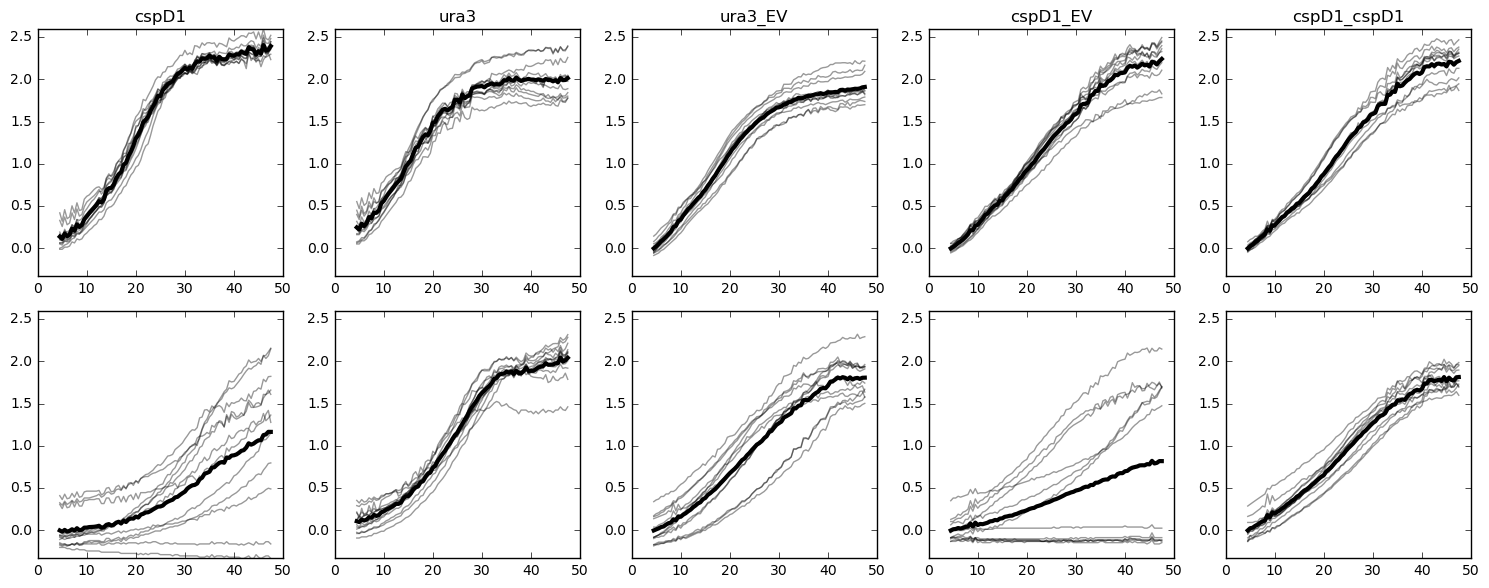

In [74]:
ncol = len(labels)

plt.figure(figsize=(3*ncol,6))
for i in range(ncol):
    for j in range(2):
        plt.subplot(2,ncol,i+j*ncol+1)
        
        if j == 0:
            plt.title(labels[i])
        
        select = (effect[:,0]==i) & (effect[:,1]==j)
        plt.plot(x,y[:,select],c='k',lw=1,alpha=.4)
        plt.plot(x,y[:,select].mean(1),c='k',lw=3)
        plt.ylim(y.min(),y.max())
        
plt.tight_layout()
plt.savefig("figures/cspD1-compliment-data.pdf",dpi=300)

In [79]:
order = ['ura3','cspD1',u'ura3_EV', u'cspD1_EV', u'cspD1_cspD1']
index = map(lambda x: order.index(x),labels)
index

[1, 0, 2, 3, 4]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4])

In [87]:
# strain, condition, vector, cspD1-include
neweffect = np.zeros((effect.shape[0],4))

# strain
neweffect[np.in1d(effect[:,0],index[1:]),0] = 1

# condition
neweffect[:,1] = effect[:,1]

# vector
neweffect[np.in1d(effect[:,0],index[2:]),2] = 1

# cspD1-include
neweffect[np.in1d(effect[:,0],index[4]),3] = 1

neweffect

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  

In [88]:
m = gpfanova.fanova.FANOVA(x,y,effect,interactions=[(0,1),(1,3)],helmertConvert=True)

In [61]:
m.sample(100,thin=10)

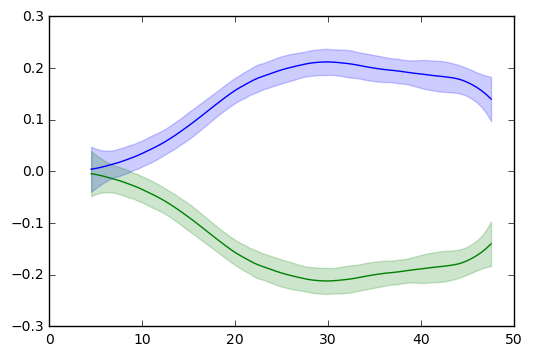

In [56]:
gpfanova.plot.plotSingleEffect(m,0,function=True)

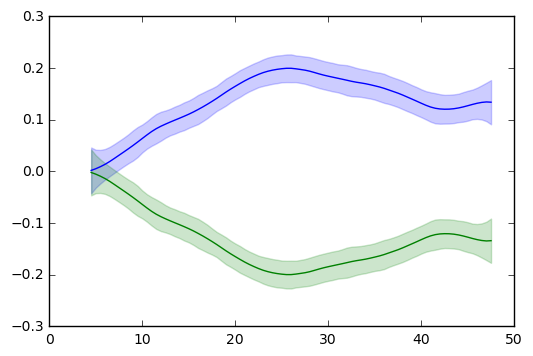

In [57]:
gpfanova.plot.plotSingleEffect(m,1,function=True)

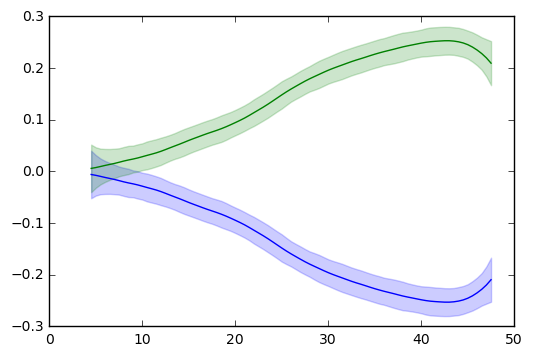

In [58]:
gpfanova.plot.plotSingleEffect(m,2,function=True)

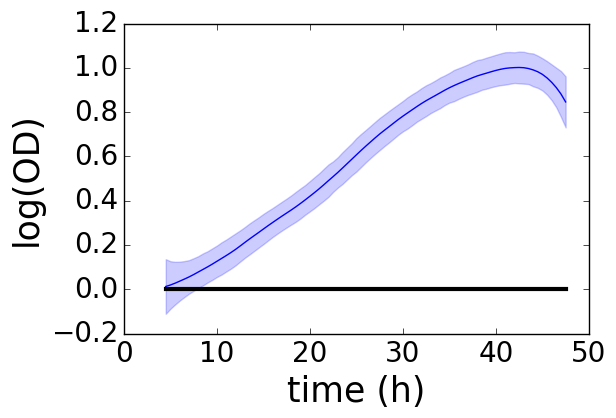

In [59]:
samples = m.parameterSamples('gamma_1').values - m.parameterSamples('gamma_0').values
samples += m.parameterSamples('(beta,gamma)_(1,1)').values - m.parameterSamples('(beta,gamma)_(1,0)').values


gpfanova.plot.plotFunctionSamples(samples,m.x,burnin=0,intervalKwargs={"tol":1e-2})
plt.plot([m.x.min(),m.x.max()],[0,0],'k',lw=3)

plt.xlabel("time (h)",fontsize=25)
plt.ylabel("log(OD)",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(-.5,.25)
plt.savefig(os.path.join('figures','cspD1-compliment-mutant.pdf'),bbox_inches='tight',dpi=300)

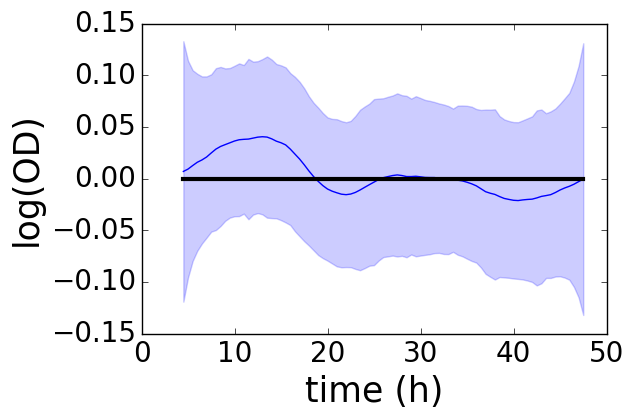

In [60]:
samples = m.parameterSamples('alpha_1').values - m.parameterSamples('alpha_0').values
samples += m.parameterSamples('(alpha,beta)_(1,1)').values - m.parameterSamples('(alpha,beta)_(0,1)').values
samples += m.parameterSamples('gamma_1').values - m.parameterSamples('gamma_0').values
samples += m.parameterSamples('(beta,gamma)_(1,1)').values - m.parameterSamples('(beta,gamma)_(1,0)').values


gpfanova.plot.plotFunctionSamples(samples,m.x,burnin=0,intervalKwargs={"tol":1e-2})
plt.plot([m.x.min(),m.x.max()],[0,0],'k',lw=3)

plt.xlabel("time (h)",fontsize=25)
plt.ylabel("log(OD)",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(-.5,.25)
plt.savefig(os.path.join('figures','cspD1-compliment-parent.pdf'),bbox_inches='tight',dpi=300)

In [7]:
# m = gpfanova.fanova.FANOVA(x,y,effect,interactions=False,helmertConvert=True,parameterFile='results/hsalTF/hsalTF_coprCompliment_helmertConvert__run1.csv')
m = gpfanova.fanova.FANOVA(x,y,effect,interactions=False,helmertConvert=True,parameterFile='results/posteriorSamples_coprCompliment_helmertConvert__run24208171.csv')
# m = gpfanova.fanova.FANOVA(x,y,effect,interactions=False,helmertConvert=True,parameterFile='results/hsalTF/hsalTF_coprCompliment_helmertConvert__run24209088.csv')
# m = gpfanova.fanova.FANOVA(x,y,effect,interactions=False,helmertConvert=True,parameterFile='results/hsalTF/hsalTF_coprCompliment_helmertConvert__run24209455.csv')

In [8]:
m.mk

[2, 2, 2]

In [9]:
m.parameter_history.shape

(487, 737)

In [25]:
# temporary workaround for mismatch in gpfanova versions
# newer version allows for multiple covariates, and assumes a lengthscale for each
# older version (where samples are from) does not

m.parameter_history['prior0_lengthscale0'] = m.parameter_history['prior0_lengthscale']
m.parameter_history['prior1_lengthscale0'] = m.parameter_history['prior1_lengthscale']
m.parameter_history['prior2_lengthscale0'] = m.parameter_history['prior2_lengthscale']
m.parameter_history['prior3_lengthscale0'] = m.parameter_history['prior3_lengthscale']

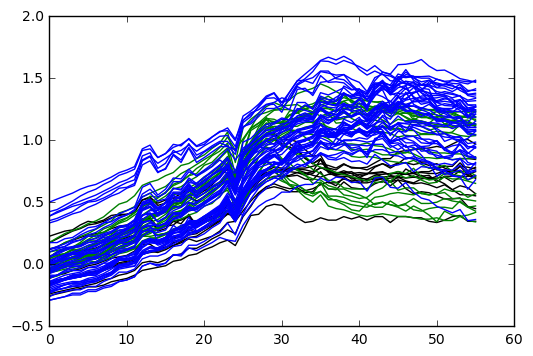

In [11]:
plt.plot(m.y[:,np.all(m.effect[:,[0,1]]==[1,0],1)],'k');
plt.plot(m.y[:,np.all(m.effect[:,[0,1]]==[1,1],1)],'g');
plt.plot(m.y[:,np.all(m.effect[:,[0,1]]==[0,0],1)],'b');

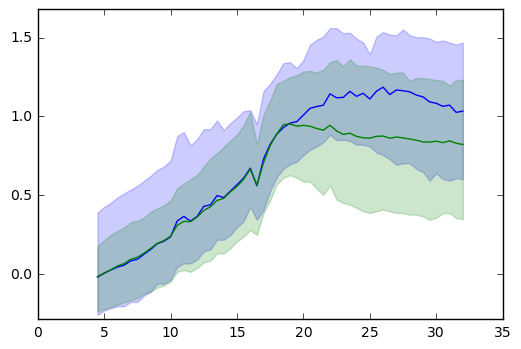

In [12]:
gpfanova.plot.plotSingleEffect(m,0,data=True)

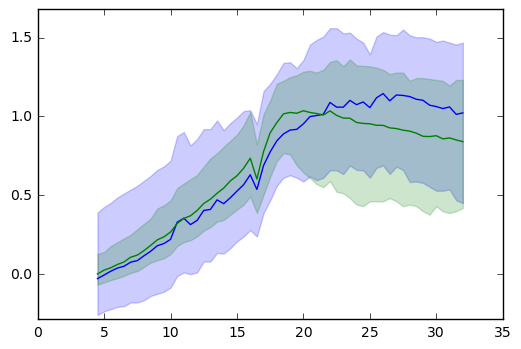

In [13]:
gpfanova.plot.plotSingleEffect(m,1,data=True)

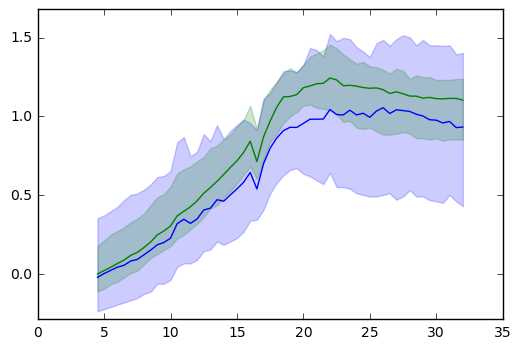

In [14]:
gpfanova.plot.plotSingleEffect(m,2,data=True)

In [15]:
ura3Ind = labels.tolist().index('ura3')
ura3Ind

4

In [16]:
labelsTrim = labels[labels!='ura3']
labelsTrim

Index([u'ura3+pMTFcmyc', u'VNG1179C+pMTFcmyc', u'VNG1179C-VNG1179C', u'copR'], dtype='object')

In [17]:
import matplotlib as mpl
import scipy
from scipy.cluster.hierarchy import linkage, leaves_list, dendrogram

def plot_delta(x,deltas,probability=False,cluster=False,plot_cluster=False,cluster_kwargs={},dendrogram_kwargs={},ytick_filter=lambda x: x):
    p = len(deltas.keys())
    n = x.shape[0]
    a = np.zeros((p,n))
    prob = np.zeros((p,n))
    yticks = [ytick_filter(k) for k in deltas.keys()]
    
    clusterShape=4

    for i,k in enumerate(deltas.keys()):
        samples = deltas[k]
        med = np.median(samples,0)
        samples = np.sort(samples,0)
        ns = samples.shape[0]
        lb,ub = .025*ns,.975*ns
        lb,ub = samples[[lb,ub],:]

        a[i,:] = med
        prob[i,:] = ub*lb>0 # any bounds without matching signs crosses the origin

    if cluster:
        l = linkage(a,**cluster_kwargs)
        ind = leaves_list(l)
        a = a[ind,:]
        prob = prob[ind,:]
        yticks = [yticks[j] for j in ind]
        
        if plot_cluster:
            ax = plt.subplot2grid((1,clusterShape),(0,0),colspan=1,rowspan=1)
            dendrogram(l,no_labels=True,orientation='left',ax=ax,**dendrogram_kwargs)
            ax.set_xticks([])

    lim = np.max(np.abs(a))
    vmin = -lim
    vmax = lim

    if plot_cluster:
        ax = plt.subplot2grid((1,clusterShape),(0,1),colspan=clusterShape-1,rowspan=1)
    else:
        ax = plt.subplot2grid((1,5),(0,0),colspan=4,rowspan=1)
        
    if probability:
        # a[np.abs(prob-.5)<.475] = 0
        a[prob<1] = 0
        
    plt.imshow(a,cmap="RdBu",interpolation="none",vmin=vmin,vmax=vmax,origin='lower',aspect="auto")
    plt.yticks(range(p),yticks)
    i = np.arange(1.*n/4,n,1.*n/4)
    plt.xticks(i,[x[j].round(2) for j in i],fontsize=15)
    plt.xlabel("time (h)",fontsize=20)
    
    if plot_cluster:
#         if probability:
#             cbarAx,kwargs = mpl.colorbar.make_axes(ax)
#             cbar = mpl.colorbar.ColorbarBase(cbarAx,cmap='RdBu',ticks=[0,.5,1],**kwargs)
#             cbar.ax.set_yticklabels(['p(less\n than parent)\n>97.5%', 'no difference', 'p(greater\n than parent)\n>97.5%'],fontsize=15)
#         else:
        plt.colorbar()
    else:
        plt.colorbar()

In [18]:
# m.parameter_cache = m.parameter_history.iloc[-1,:]

In [19]:
# m.sample(3000,10,random=True)
# m.parameter_history.shape

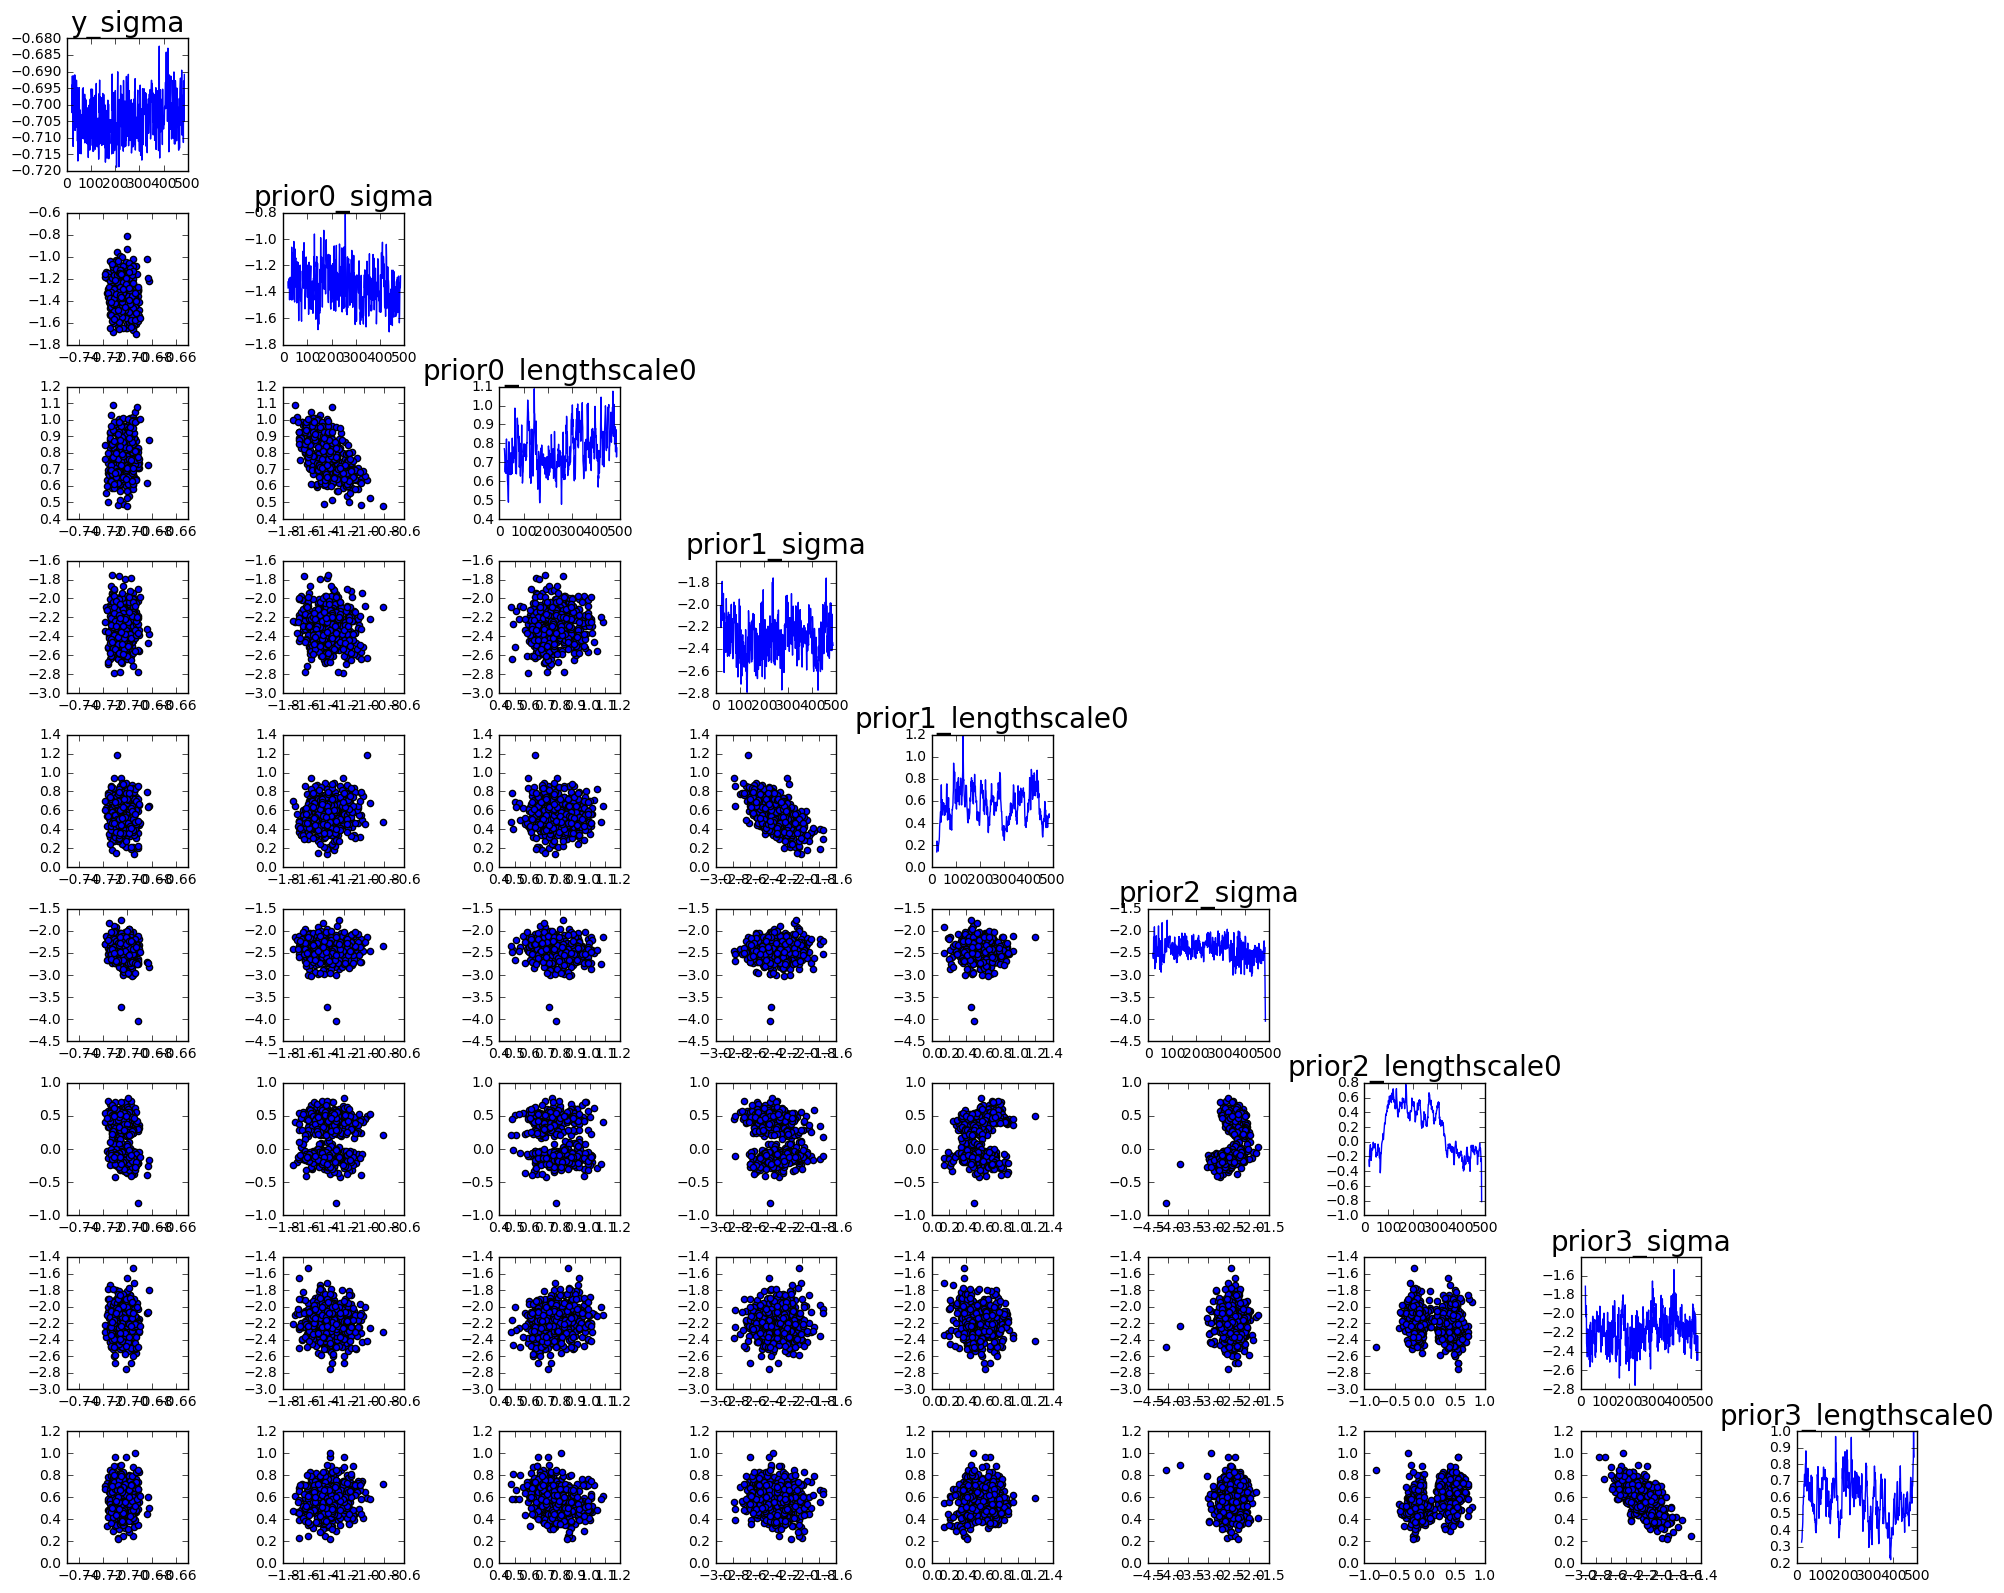

In [26]:
plt.figure(figsize=(20,16))
gpfanova.plot.plotHyperparameters(m,correlative=True,burnin=20)
plt.tight_layout(pad=1)
plt.savefig(os.path.join('figures','copr-hyperparameters.png'),bbox_inches='tight',dpi=300)

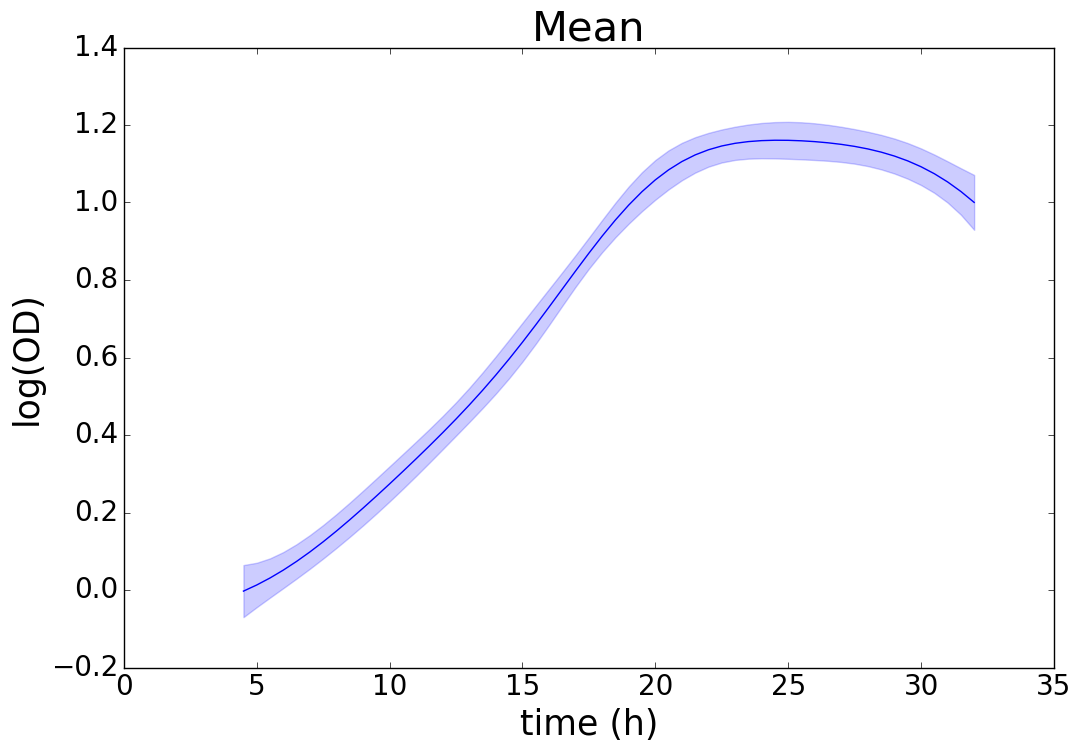

In [28]:
plt.figure(figsize=(12,8))
gpfanova.plot.plotFunctionSamples(m.parameterSamples('mean').values,x=m.x,intervalKwargs={'tol':1e-1},burnin=20)
plt.title("Mean",fontsize=30)
plt.legend(loc='best',fontsize=20)
plt.xlabel("time (h)",fontsize=25)
plt.ylabel("log(OD)",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig(os.path.join('figures','copr-mean.png'),bbox_inches='tight',dpi=300)

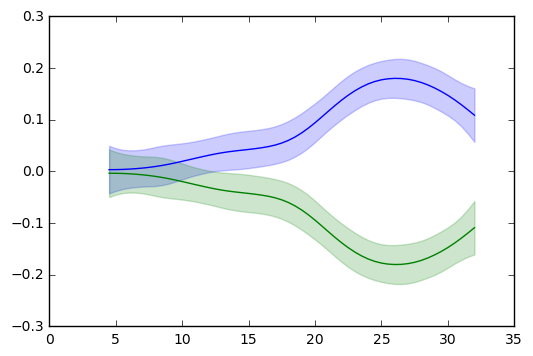

In [29]:
gpfanova.plot.plotSingleEffect(m,0,function=True,burnin=20)

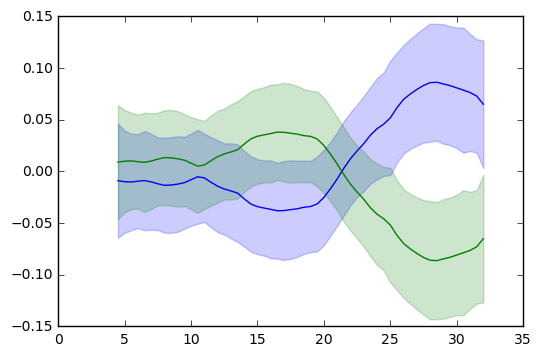

In [30]:
gpfanova.plot.plotSingleEffect(m,1,function=True,burnin=20)

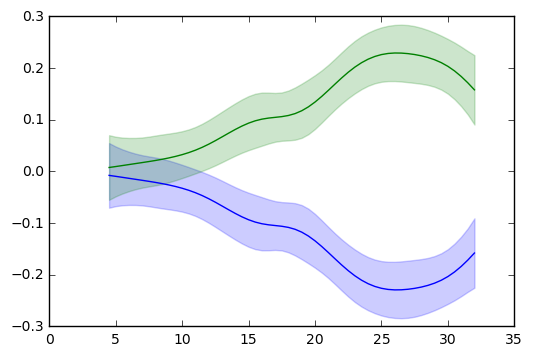

In [31]:
gpfanova.plot.plotSingleEffect(m,2,function=True,burnin=20)

In [32]:
shiftInd = 23

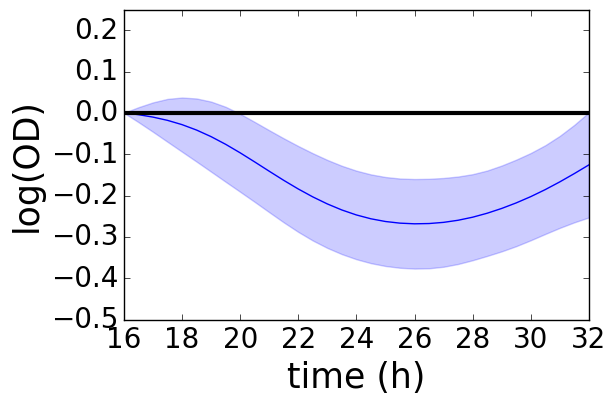

In [33]:
offset = m.parameterSamples('alpha_1').values[:,shiftInd] - m.parameterSamples('alpha_0').values[:,shiftInd]
samples= m.parameterSamples('alpha_1').values[:,shiftInd:] - m.parameterSamples('alpha_0').values[:,shiftInd:] - offset[:,None]
    
gpfanova.plot.plotFunctionSamples(samples,m.x[shiftInd:],burnin=20,intervalKwargs={"tol":1e-2})
plt.plot([m.x[shiftInd:].min(),m.x[shiftInd:].max()],[0,0],'k',lw=3)

plt.xlabel("time (h)",fontsize=25)
plt.ylabel("log(OD)",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-.5,.25)
plt.savefig(os.path.join('figures','copr-Control.pdf'),bbox_inches='tight',dpi=300)

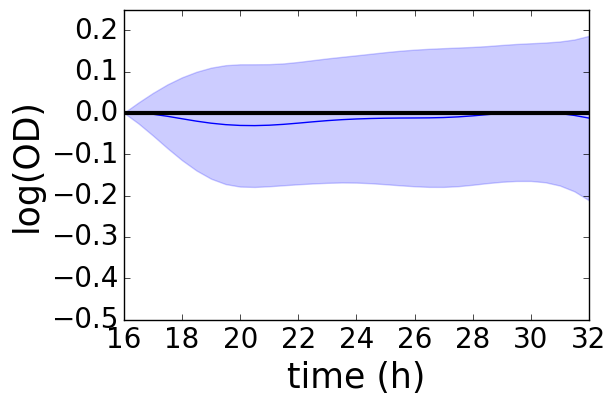

In [34]:
offset = m.parameterSamples('alpha_1').values[:,shiftInd] - m.parameterSamples('alpha_0').values[:,shiftInd] +  m.parameterSamples('gamma_1').values[:,shiftInd] - m.parameterSamples('gamma_0').values[:,shiftInd]
samples= m.parameterSamples('alpha_1').values[:,shiftInd:] - m.parameterSamples('alpha_0').values[:,shiftInd:] +  m.parameterSamples('gamma_1').values[:,shiftInd:] - m.parameterSamples('gamma_0').values[:,shiftInd:] - offset[:,None]
    
gpfanova.plot.plotFunctionSamples(samples,m.x[shiftInd:],burnin=20,intervalKwargs={"tol":1e-2})
plt.plot([m.x[shiftInd:].min(),m.x[shiftInd:].max()],[0,0],'k',lw=3)

plt.xlabel("time (h)",fontsize=25)
plt.ylabel("log(OD)",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-.5,.25)
plt.savefig(os.path.join('figures','copr-compliment.pdf'),bbox_inches='tight',dpi=300)